In [24]:
import numpy as np
import pandas as pd
from datetime import date
import sidetable as stb
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [25]:
df_despesa = pd.read_excel('PLANILHA_MENSAL_ DESPESAS.xlsx')

In [26]:
df_despesa.columns

Index(['DESPESAS', 'VALOR', 'DATA VENCIMENTO', 'STATUS', 'ENTRADAS',
       'Unnamed: 5'],
      dtype='object')

In [27]:
df_desp = df_despesa.drop(['Unnamed: 5'],axis=1)

In [28]:
df_desp

,DESPESAS,VALOR,DATA VENCIMENTO,STATUS,ENTRADAS
0,NUBANK,2222.95,2021-05-03,Pago,5116.20
1,SRAIVA,305.89,2021-05-03,Pago,150.01
2,OI,55.90,2021-05-03,Pago,300.00
3,SÃO MATEUS,500.01,2021-05-03,Pago,200.00
4,MAGAZINE,331.23,2021-05-04,Pago,300.00
5,HAP VIDA,845.64,2021-05-09,Pago,NaN
6,CLARO,69.99,2021-05-09,Pago,NaN
7,INTER,109.39,2021-05-10,Pago,NaN
8,DOAÇÃO,100.01,2021-05-10,Pago,NaN
9,WPA,565.01,2021-05-10,Pago,NaN


In [29]:
d = df_desp.dtypes
d

DESPESAS                   object
VALOR                     float64
DATA VENCIMENTO    datetime64[ns]
STATUS                     object
ENTRADAS                  float64
dtype: object

In [30]:
df_desp.VALOR[:19].max()

2222.95

In [31]:
df_desp.VALOR[:19].min()

34.99

In [32]:
df_desp.VALOR[:19].median()

150.01

In [33]:
df_desp.VALOR[:19].sum()

6642.620000000001

In [34]:
df_desp.VALOR[:19].sort_values().reset_index()

,index,VALOR
0,14,34.99
1,17,35.01
2,10,43.01
3,2,55.90
4,16,61.01
5,6,69.99
6,8,100.01
7,11,103.14
8,7,109.39
9,18,150.01


In [35]:
df_desp.VALOR[:19].mean()

349.61157894736846

In [36]:
df_despesa['DATA VENCIMENTO'].value_counts()

2021-05-10    5
2021-05-03    4
2021-05-09    2
2021-05-11    2
2021-05-30    2
2021-05-04    1
2021-05-12    1
2021-05-15    1
2021-05-19    1
2021-05-21    1
Name: DATA VENCIMENTO, dtype: int64

In [37]:
np.__version__

'1.21.5'

In [38]:
df_despesa['DATA VENCIMENTO'] = pd.to_datetime(df_despesa['DATA VENCIMENTO'])

df_despesa['DATA VENCIMENTO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21 entries, 0 to 20
Series name: DATA VENCIMENTO
Non-Null Count  Dtype         
--------------  -----         
20 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 296.0 bytes


In [39]:
df_despesa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DESPESAS         21 non-null     object        
 1   VALOR            21 non-null     float64       
 2   DATA VENCIMENTO  20 non-null     datetime64[ns]
 3   STATUS           20 non-null     object        
 4   ENTRADAS         6 non-null      float64       
 5   Unnamed: 5       4 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.1+ KB


In [40]:
df_despesa['DATA VENCIMENTO'].dt.day

0      3.0
1      3.0
2      3.0
3      3.0
4      4.0
5      9.0
6      9.0
7     10.0
8     10.0
9     10.0
10    10.0
11    11.0
12    11.0
13    12.0
14    15.0
15    19.0
16    21.0
17    30.0
18    30.0
19    10.0
20     NaN
Name: DATA VENCIMENTO, dtype: float64

In [41]:
df_despesa['DATA VENCIMENTO'].dt.month
df_despesa['DATA VENCIMENTO'].dt.year

0     2021.0
1     2021.0
2     2021.0
3     2021.0
4     2021.0
5     2021.0
6     2021.0
7     2021.0
8     2021.0
9     2021.0
10    2021.0
11    2021.0
12    2021.0
13    2021.0
14    2021.0
15    2021.0
16    2021.0
17    2021.0
18    2021.0
19    2021.0
20       NaN
Name: DATA VENCIMENTO, dtype: float64

In [42]:
dff = df_despesa.stb.freq(['DATA VENCIMENTO'])
dff

,DATA VENCIMENTO,count,percent,cumulative_count,cumulative_percent
0,2021-05-10,5,25.0,5,25.0
1,2021-05-03,4,20.0,9,45.0
2,2021-05-30,2,10.0,11,55.0
3,2021-05-11,2,10.0,13,65.0
4,2021-05-09,2,10.0,15,75.0
5,2021-05-21,1,5.0,16,80.0
6,2021-05-19,1,5.0,17,85.0
7,2021-05-15,1,5.0,18,90.0
8,2021-05-12,1,5.0,19,95.0
9,2021-05-04,1,5.0,20,100.0


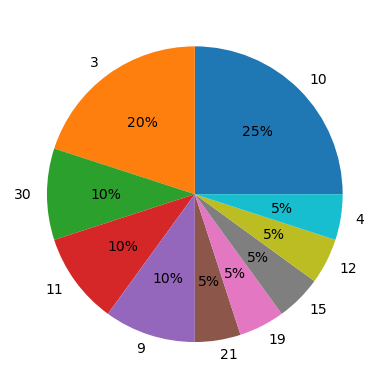

In [43]:
plt.pie(x=dff['percent'],labels=dff['DATA VENCIMENTO'].dt.day, autopct='%.0f%%');

In [44]:
import pandas as pd
import numpy as np

# Criar um exemplo de DataFrame
df = pd.DataFrame({'A': np.random.normal(0, 1, 100),
                   'B': np.random.normal(0, 1, 100)})

# Calcular a covariância entre A e B
covariante = df['A'].cov(df['B'])

print("A covariância entre A e B é:", covariante)


A covariância entre A e B é: 0.05288962793868816


In [45]:
cov = dff['percent'].cor(dff['count'])
cov

AttributeError: 'Series' object has no attribute 'cor'

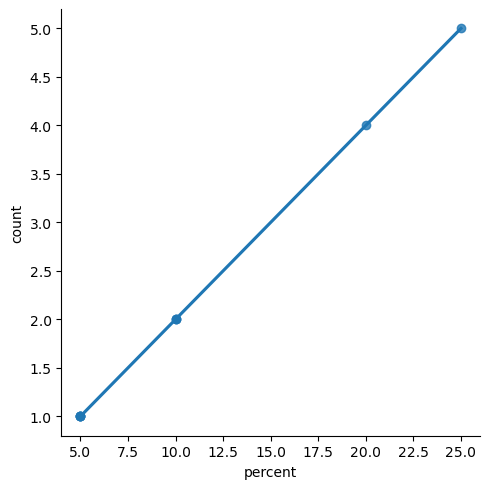

In [46]:
disp = sns.lmplot(x='percent', y='count', data=dff)

In [47]:
df = pd.DataFrame(
    data=np.corrcoef(dff['percent'], dff['count']),
    index= ['percent','count'],
    columns=['percent','count']

)

df

,percent,count
percent,1.0,1.0
count,1.0,1.0


In [48]:
dff.corr()

/tmp/ipykernel_17114/788259740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.corr()


,count,percent,cumulative_count,cumulative_percent
count,1.000000,1.000000,-0.935836,-0.935836
percent,1.000000,1.000000,-0.935836,-0.935836
cumulative_count,-0.935836,-0.935836,1.000000,1.000000
cumulative_percent,-0.935836,-0.935836,1.000000,1.000000


In [49]:
velocidade = pd.DataFrame({
    'velocidade':[50,60,70,80,90],
    'km':[50,60,70,80,90],
    'tempoM':[50,40,30,20,10]
})

velocidade


,velocidade,km,tempoM
0,50,50,50
1,60,60,40
2,70,70,30
3,80,80,20
4,90,90,10


In [50]:
velocidade.corr()

,velocidade,km,tempoM
velocidade,1.0,1.0,-1.0
km,1.0,1.0,-1.0
tempoM,-1.0,-1.0,1.0


In [51]:
np.corrcoef(velocidade['velocidade'], velocidade['tempoM'])

array([[ 1., -1.],
       [-1.,  1.]])

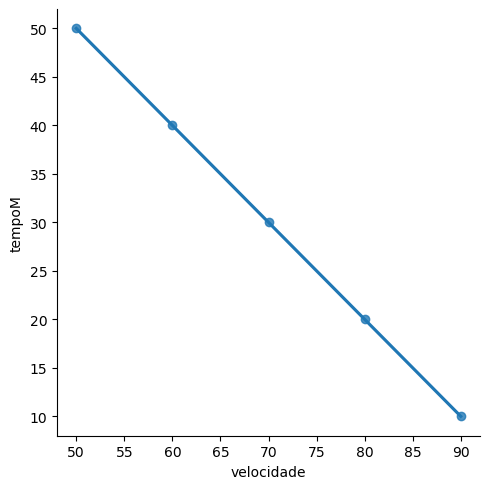

In [52]:
sns.lmplot(data=velocidade,x='velocidade', y='tempoM')

<AxesSubplot: >

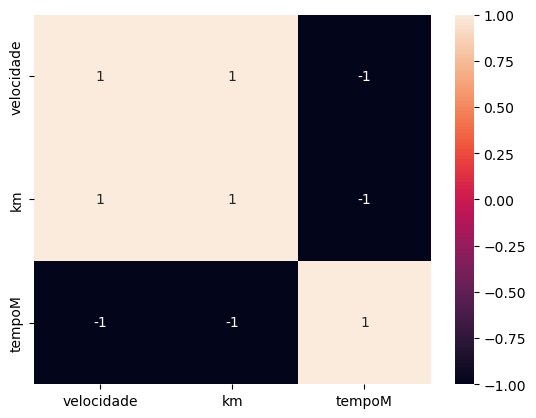

In [53]:
sns.heatmap(velocidade.corr('spearman'), annot=True)

<AxesSubplot: >

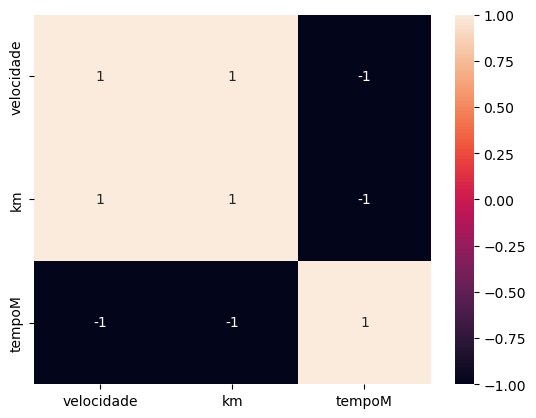

In [54]:
sns.heatmap(velocidade.corr(), annot=True)

In [55]:
cov = velocidade['velocidade'].cov(velocidade['tempoM'])
cov

-250.0

In [56]:
velocidade.max()

velocidade    90
km            90
tempoM        50
dtype: int64

In [62]:
velocit_tabela = pd.crosstab(index= velocidade['velocidade'], columns= velocidade['tempoM'])

In [63]:
velocit_tabela

tempoM,10,20,30,40,50
velocidade,,,,,
50,0,0,0,0,1
60,0,0,0,1,0
70,0,0,1,0,0
80,0,1,0,0,0
90,1,0,0,0,0


In [66]:
df_desp.head()

,DESPESAS,VALOR,DATA VENCIMENTO,STATUS,ENTRADAS
0,NUBANK,2222.95,2021-05-03,Pago,5116.20
1,SRAIVA,305.89,2021-05-03,Pago,150.01
2,OI,55.90,2021-05-03,Pago,300.00
3,SÃO MATEUS,500.01,2021-05-03,Pago,200.00
4,MAGAZINE,331.23,2021-05-04,Pago,300.00


In [68]:
assoc_despesa = pd.crosstab(df_desp['DESPESAS'],  df_desp['VALOR'])
assoc_despesa.T

DESPESAS,CLARO,DOAÇÃO,DORA,EMPRESTIMO,ENERGIA,HAP VIDA,INTER,ITAÚ,MAGAZINE,MEI,...,OI,Pós-Graduação,SEGURO,SRAIVA,SÃO MATEUS,TIM,TOTAL,VITREO,WPA,ÁGUA
VALOR,,,,,,,,,,,,,,,,,,,,,
34.99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
35.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43.01,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
55.90,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
61.01,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69.99,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100.01,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103.14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
109.39,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
valor = pd.read_excel('credito_renomeado.xlsx').head(30)
valor

,Unnamed: 0,ID,valor_credito,sexo,nivel_escolaridade,estado_civil,idade,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005,default payment next month
0,0,1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,1,2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2,3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,3,4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,4,5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,5,6,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,6,7,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,7,8,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,8,9,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,9,10,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [82]:
tab_valor = pd.crosstab(index=valor['valor_credito'], columns=valor['sexo'])
tab_valor


sexo,1.0,2.0
valor_credito,,
20000.0,2,1
50000.0,4,4
60000.0,1,0
70000.0,1,1
90000.0,1,1
100000.0,0,1
120000.0,0,2
130000.0,0,1
140000.0,0,1


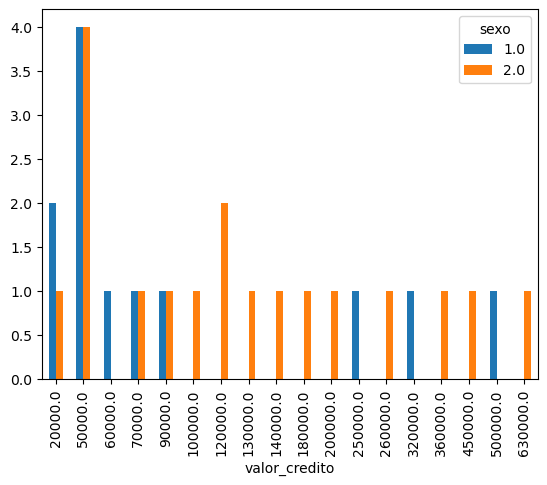

In [89]:
plt.Figure(figsize=(15,10))
tab_valor.plot.bar();
plt.legend(title='sexo')

In [76]:
grupo = valor.groupby('sexo')['valor_credito'].mean()
grupo

sexo
1.0    127500.000000
2.0    170555.555556
Name: valor_credito, dtype: float64

In [90]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

In [94]:
df_tips = sns.load_dataset('tips')
print(df_tips.shape)
conta = df_tips.head(100)
conta

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2


In [101]:
conta = conta.rename(columns={
    'total_bill':'conta_total',
    'tip':'tipo',
    'sex':'sexo',
    'smoker':'fumante',
    'day':'dia_semana',
    'time':'turno',
    'size':'qtd_pedido'
})

In [102]:
conta.to_excel('conta_total_restaurante.xlsx')

In [105]:
sex_smoker = pd.crosstab(index=conta['sexo'], columns=conta['fumante'])
sex_smoker

fumante,Yes,No
sexo,,
Male,15,59
Female,5,21


<AxesSubplot: xlabel='sexo'>

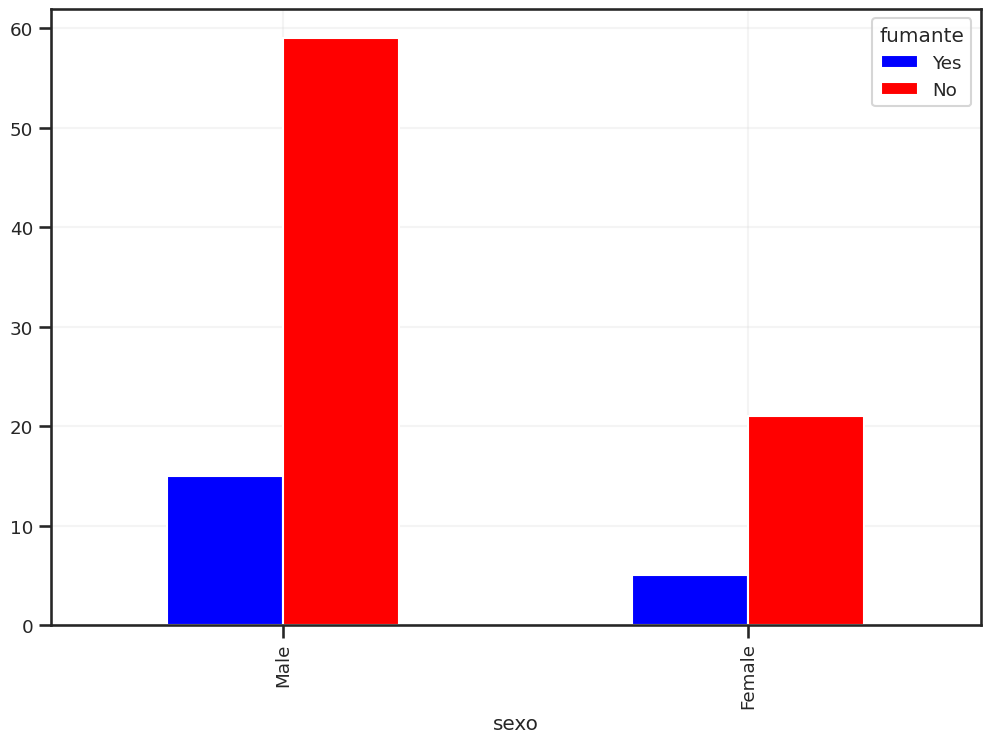

In [112]:
sex_smoker.plot.bar(color=(['blue','red']))

In [114]:
stats.chi2_contingency(sex_smoker)

(0.0,
 1.0,
 1,
 array([[14.8, 59.2],
        [ 5.2, 20.8]]))

In [115]:
stats.contingency.association(sex_smoker)

0.011399018814688829

In [116]:
conta

,conta_total,tipo,sexo,fumante,dia_semana,turno,qtd_pedido
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2


In [118]:
tab = pd.crosstab(conta['dia_semana'], conta['turno'])
stats.contingency.association(tab)

1.0

In [119]:
stats.chi2_contingency(tab)

(100.00000000000001,
 1.554159431389603e-21,
 3,
 array([[ 1.69, 11.31],
        [ 1.3 ,  8.7 ],
        [ 5.59, 37.41],
        [ 4.42, 29.58]]))

<AxesSubplot: xlabel='dia_semana'>

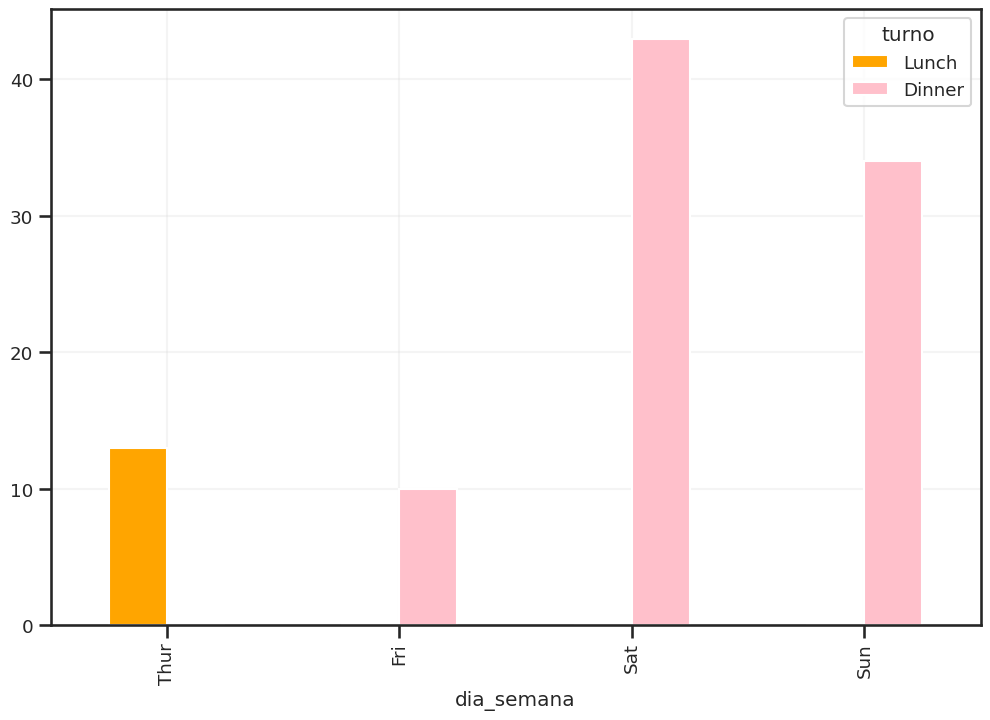

In [124]:
tab.plot.bar(color=(['orange','pink']))

In [121]:
tab

turno,Lunch,Dinner
dia_semana,,
Thur,13,0
Fri,0,10
Sat,0,43
Sun,0,34


In [125]:
stats.contingency.association(tab)

1.0

<AxesSubplot: xlabel='dia_semana', ylabel='turno'>

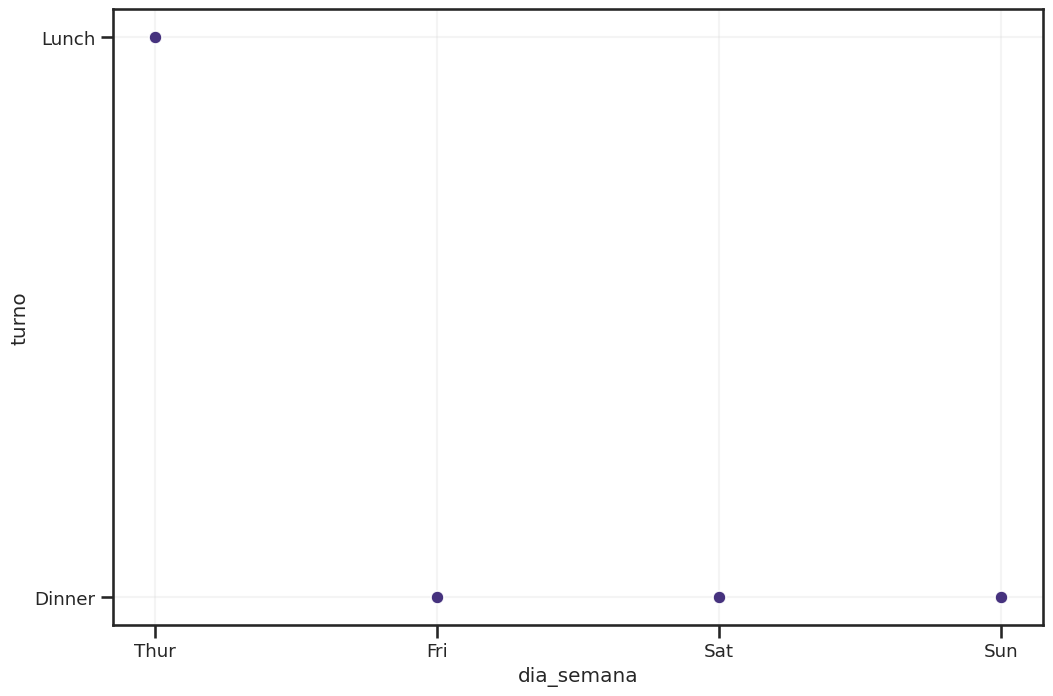

In [126]:
sns.scatterplot(data=conta, x='dia_semana',y='turno')

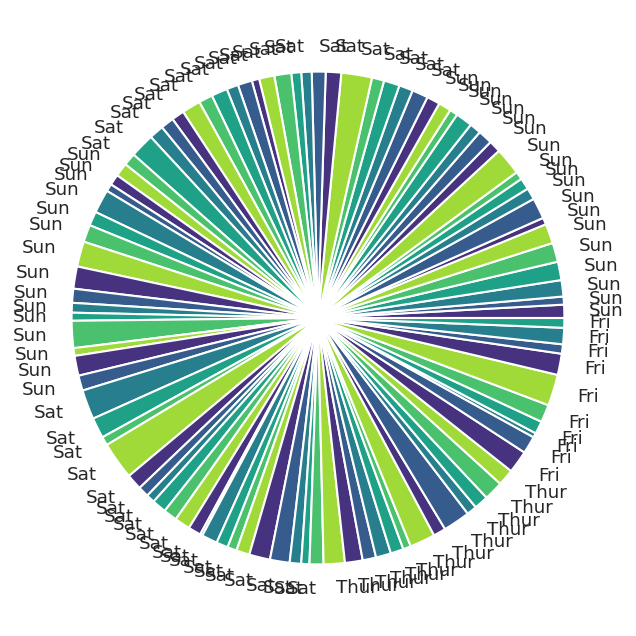

In [139]:
plt.pie(x=conta['conta_total'],labels=conta['dia_semana']);